# Merging,Joining , Concatenating Pandas I/O 

Multiple Data & Tbale hai tou kaise merge karke hum apna kaam krskte 

In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:

deliveries = pd.read_csv('dataset/merging/deliveries.csv')
matches = pd.read_csv('dataset/merging/matches.csv')

courses = pd.read_csv('dataset/merging/courses.csv')
nov  = pd.read_csv('dataset/merging/reg-month1.csv')
dec = pd.read_csv('dataset/merging/reg-month2.csv')
students = pd.read_csv('dataset/merging/students.csv')


In [3]:
courses
students

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
6,7,Tarun Thaker,9
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8


In [4]:
nov.shape
dec.shape

(28, 2)

### pd.concat() 
Vertical stack krdena  dataframe ko hai generally concat karna hai 2 dataframe krna 

#### use ignore_index=True  for solving index issue

In [5]:
regs= pd.concat([nov,dec],ignore_index=True)
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


#### sane we can do with append() - nov.append(dec) 

In [6]:
nov.append(dec,ignore_index=True) # index se bachneko vps ignore_index lagado 

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


####  Hamesha concat() use karo append ke jageh because append() depricate horaha hoggga kuch time mai 

#### MultiIndex DataFrame 

In [7]:
multi = pd.concat([nov,dec],keys=['Nov','Dec'])
multi.loc['Nov']
multi.loc[('Nov',4)]

student_id    16
course_id      9
Name: (Nov, 4), dtype: int64

In [8]:
# side by side joddna hai 
pd.concat([nov,dec],axis=1)

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


#### Inner Join 

Inner join mai 2 table hai usko inner join krna hai tou , tbhi dono ke common item jo rehte vo inner join rehta hai 

In [9]:
students

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
6,7,Tarun Thaker,9
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8


In [10]:
students.merge(regs,how='inner',on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


#### left Join 


In [11]:
courses.merge(regs,how='left',on='course_id')

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


#### Right Join 

In [12]:
# right join 

rjtemp= pd.DataFrame({
    'student_id':[25,26,29],
    'name':['Nit','Ank','Rah'],
    'partner':[28,26,17]
})

In [13]:
rjtemp

,student_id,name,partner
0,25,Nit,28
1,26,Ank,26
2,29,Rah,17


In [14]:
students.head(2)

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1


In [15]:
students

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
6,7,Tarun Thaker,9
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8


In [16]:
students= pd.concat([students,rjtemp],ignore_index=True)

In [17]:
students.tail()

,student_id,name,partner
23,24,Radhika Suri,17
24,25,Shashank D’Alia,2
25,25,Nit,28
26,26,Ank,26
27,29,Rah,17


In [18]:
students.merge(regs,how='right',on='student_id')

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9
5,18,Fardeen Mahabir,13.0,1
6,1,Kailash Harjo,23.0,1
7,7,Tarun Thaker,9.0,8
8,22,Yash Sethi,21.0,3
9,15,Preet Sha,16.0,1


In [19]:
students.merge(regs,how='left',on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1.0
1,1,Kailash Harjo,23,6.0
2,1,Kailash Harjo,23,10.0
3,1,Kailash Harjo,23,9.0
4,2,Esha Butala,1,5.0
...,...,...,...,...
56,25,Shashank D’Alia,2,10.0
57,25,Nit,28,1.0
58,25,Nit,28,10.0
59,26,Ank,26,NaN


#### full Outer Join 

In [20]:
students.merge(regs,how='outer',on='student_id').tail(10)

,student_id,name,partner,course_id
54,24,Radhika Suri,17.0,4.0
55,25,Shashank D’Alia,2.0,1.0
56,25,Shashank D’Alia,2.0,10.0
57,25,Nit,28.0,1.0
58,25,Nit,28.0,10.0
59,26,Ank,26.0,NaN
60,29,Rah,17.0,NaN
61,42,NaN,NaN,9.0
62,50,NaN,NaN,8.0
63,38,NaN,NaN,1.0


### Qs. find total revenue generated 

In [27]:
regs.merge(courses,how="inner",on='course_id')
regs.merge(courses,how="inner",on='course_id')['price'].sum()

154247

### find month by month revenue 

In [38]:
# nov & dec ka registration batana hai 
tempdf= pd.concat([nov,dec],keys=['Nov','Dec']).reset_index()

tempdf.merge(courses,how='inner',on='course_id').groupby('level_0')['price'].sum()


level_0
Dec    65072
Nov    89175
Name: price, dtype: int64

### Print the registration table 

In [46]:
# cols ->name->course ->price

regs.merge(students,on='student_id').merge(courses,on='course_id')[['name','course_name','price']]

,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,python,2499
2,Fardeen Mahabir,python,2499
3,Kailash Harjo,python,2499
4,Seema Kota,python,2499
5,Shashank D’Alia,python,2499
6,Nit,python,2499
7,Radha Dutt,python,2499
8,Pranab Natarajan,python,2499
9,Chhavi Lachman,machine learning,9999


#### Qs. plot a bar chart for revenue of each individual courses

<AxesSubplot: xlabel='course_name'>

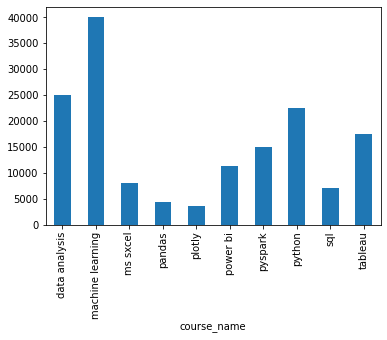

In [63]:
regs.merge(courses,how='inner',on='course_id').groupby('course_name')['price'].sum().plot(kind='bar')

### Qs. find students who enrolled in both the months 

so yeah nov & dec ke student id series hai  so we will use numpy as  np.intersect1d tou yeah common id nikalke dedega dono bhi dataset mai se 
fir isin lagake check krenge 

In [72]:
common_studentid = np.intersect1d(nov['student_id'],dec['student_id'])
common_studentid

array([ 1,  3,  7, 11, 16, 17, 18, 22, 23], dtype=int64)

In [74]:
students[students['student_id'].isin(common_studentid)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


#### Qs. find course that got no enrollment 

In [82]:
courses['course_id']
regs['course_id']

no_regs_course=np.setdiff1d(courses['course_id'],regs['course_id'])

courses[courses['course_id'].isin(no_regs_course)]


,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


#### Qs. find students who did not enroll into any courses

we wil solve it by using np.setdiff1d

In [90]:
std_id_lst = np.setdiff1d(students['student_id'],regs['student_id'])
students[students['student_id'].isin(std_id_lst)].shape[0]
(9/28)*100

32.142857142857146

### Qs. Print student name -> partner name for all enrolled students 

self Join : ek table ko khudkesath hie join kardete hai ish join mai 

In [104]:
students.merge(students,how='inner',left_on='partner',right_on='student_id')
# [['name_x','name_y']]
# students

,student_id_x,name_x,partner_x,student_id_y,name_y,partner_y
0,1,Kailash Harjo,23,23,Chhavi Lachman,18
1,2,Esha Butala,1,1,Kailash Harjo,23
2,3,Parveen Bhalla,3,3,Parveen Bhalla,3
3,4,Marlo Dugal,14,14,Pranab Natarajan,22
4,5,Kusum Bahri,6,6,Lakshmi Contractor,10
5,6,Lakshmi Contractor,10,10,Aayushman Sant,8
6,7,Tarun Thaker,9,9,Nitika Chatterjee,4
7,8,Radheshyam Dey,5,5,Kusum Bahri,6
8,9,Nitika Chatterjee,4,4,Marlo Dugal,14
9,10,Aayushman Sant,8,8,Radheshyam Dey,5


#### Qs find top 3 students who did most number enrollments 

In [123]:
regs.merge(students,on='student_id').groupby(['student_id','name'])['name'].count().sort_values(ascending=False).head(3)

student_id  name          
23          Chhavi Lachman    6
7           Tarun Thaker      5
1           Kailash Harjo     4
Name: name, dtype: int64

### Qs. Find the top 3 students who spent most amount of money on courses 

In [133]:
regs.merge(students,on='student_id').merge(courses,on='course_id').groupby(['student_id','name'])['price'].sum().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      22594
14          Pranab Natarajan    15096
19          Qabeel Raman        13498
Name: price, dtype: int64

## Alternate Syntax for merge() E.g: 
students.merge(regs,how='inner,on='student_id')

pd.merge(students,regs,how='inner,on='student_id')

## Qs on IPL Dataset 

#### Qs. find top 3 stadiums with highest sixes per match ratio 

In [139]:
matches.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [138]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [149]:
ipl_tempdf = deliveries.merge(matches,left_on='match_id',right_on='id')
six_tempdf= ipl_tempdf[ipl_tempdf['batsman_runs']==6]
six_tempdf.head(0)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [170]:
# stadium ka naam & usme kitne sixes pade hai 

# six_tempdf.groupby('venue')[['venue','batsman_runs']]
num_six_df =  six_tempdf.groupby('venue')['venue'].count()


In [171]:
num_matches = matches['venue'].value_counts()

In [174]:
(num_six_df/num_matches).sort_values(ascending=False).head(3)

Holkar Cricket Stadium     17.600000
M Chinnaswamy Stadium      13.227273
Sharjah Cricket Stadium    12.666667
Name: venue, dtype: float64

#### Qs. find the orange cap holder of all the season  

In [196]:
ipl_tempdf.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=False).drop_duplicates(['season'],keep='first').sort_index()


,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641
